# Explore GLIMS data

Author: Ann Windnagel

Date: 02/19/2019

This notebook is a scratch space to explore the GLIMS data. It opens up GLIMS data files, explores the dataframes, and plots some data. See http://www.glims.org/ for information about GLIMS and to download the data.

### Import Python Packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import earthpy as et

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

## Open the full GLIMS database file
Open the file and explore the columns, size, and crs.

In [2]:
# Open GLIMS polygons using geopandas
glims_file_path = "data/glims/raw/glims_download_20190304/glims_polygons.shp"
glims_polygons = gpd.read_file(glims_file_path)

In [3]:
glims_polygons['anlys_time'].dtype

dtype('O')

In [4]:
# Quick look at the data
glims_polygons.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
0,debris_cov,121031.0,G006338E44942N,2013-03-25T00:00:00,0.0041,0.010639,0.0,61.1478,0.0,3040.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.339466 44.942715 0, 6.339479 44...."
1,debris_cov,121554.0,G006337E44931N,2013-03-20T00:00:00,1.9080,1.907390,0.0,3558.5700,0.0,2434.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.341819 44.932777 0, 6.341794 44...."
2,debris_cov,121554.0,G006337E44931N,2013-03-20T00:00:00,1.9080,1.907390,0.0,3558.5700,0.0,2434.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.343297 44.93374 0, 6.34329 44.93..."
3,debris_cov,121367.0,G006992E45913N,2013-03-25T00:00:00,7.6856,7.687140,0.0,5010.4600,0.0,2276.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.989013 45.91748 0, 6.988627 45.9..."
4,debris_cov,121128.0,G006340E45124N,2013-03-25T00:00:00,0.1238,0.123768,0.0,670.7820,0.0,2807.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.343491 45.121894 0, 6.343597 45...."


In [5]:
# Check CRS
print(glims_polygons.crs)

{'init': 'epsg:4326'}


In [6]:
# Explore column headings
print("Number of columns:")
print(len(glims_polygons.columns))
print("Column names:")
print(list(glims_polygons))

Number of columns:
31
Column names:
['line_type', 'anlys_id', 'glac_id', 'anlys_time', 'area', 'db_area', 'width', 'length', 'primeclass', 'min_elev', 'mean_elev', 'max_elev', 'src_date', 'rec_status', 'glac_name', 'wgms_id', 'local_id', 'glac_stat', 'subm_id', 'release_dt', 'proc_desc', 'rc_id', 'geog_area', 'chief_affl', 'loc_unc_x', 'loc_unc_y', 'glob_unc_x', 'glob_unc_y', 'submitters', 'analysts', 'geometry']


### Description of each GLIMS column from http://www.glims.org/MapsAndDocs/downloaded_field_desc.html
Bolded items are actually in the dataframe in the cell above.

1. **LINE_TYPE:**	Category of line segment. Possible values include: "glac_bound" (glacier boundary), "intrnl_rock" (internal rock outcrop, or nunatak), "snowline", "centerline" (center flowline of the glacier).
1. **ANLYS_ID:**	The ID assigned within GLIMS for a particular outline of a glacier at a particular time.
1. **GLAC_ID:**	The GLIMS glacier ID
1. **ANLYS_TIME:**	Representative time the analysis was carried out.
1. **AREA:**	Map-plane area of the glacier, as provided by the analyst, km2.
1. **DB_AREA:**	Map-plane area of the glacier, as calculated within the GLIMS Glacier Database, km2. Use this one.
1. **WIDTH:**	Representative width of the glacier, meters.
1. **LENGTH:**	Representative length of the glacier, meters.
1. **PRIMECLASS:**	Primary WGMS classification of the glacier.
1. **MIN_ELEV:**	Elevation of the lowest part of the glacier, in meters above sea level.
1. **MEAN_ELEV:**	Mean elevation of the glacier, in meters above sea level.
1. **MAX_ELEV:**	Elevation of the highest part of the glacier, in meters above sea level.
1. **SRC_DATE:**	The as-of date for the outline. Usually the acquisition date of the image.
1. **REC_STATUS:**	Record status (should always be "okay" for downloaded data).
1. **GLAC_NAME:**	Glacier name.
1. **WGMS_ID:**	Glacier ID assigned by the World Glacier Monitoring Service.
1. **LOCAL_ID:**	An ID assigned by the GLIMS Regional Center or institution that supplied the data.
1. **SUBM_ID:**	ID assigned by GLIMS to the entire data submission.
1. RELEASE_OK	Date after which the data is released.
1. **PROC_DESC:**	Description of the processing done to create the glacier outlines.
1. SUBMIT_SUR	Surname of the person submitting the data.
1. SUBMIT_GIV	Given names of the person submitting the data.
1. SUBMIT_AFF	Affiliation of the person submitting the data.
1. SUBMIT_URL	URL for the submitting institution.
1. SUBMIT_CCO	Country code for the submitting institution.
1. ANLST_SURN	Surname of the analyst.
1. ANLST_GIVN	Given names of the analyst.
1. ANLST_AFFL	Affiliation of the analyst.
1. ANLST_URL	URL related to the analyst.
1. ANLST_CCOD	Country code for the analyst.
1. CHIEF_SURN	Surname of the chief of the Regional Center.
1. CHIEF_GIVN	Given names of the chief of the Regional Center.
1. **CHIEF_AFFL:**	Affiliation of the chief of the Regional Center.
1. RC_URL	URL for the Regional Center.
1. RC_CCODE	Country code for the Regional Center.
1. **RC_ID:**	GLIMS ID for the Regional Center. This is the center who did the work.
1. **GEOG_AREA:**	Geographic region covered by the Regional Center.

These columns are in the dataframe but not described in the list above:
1. glac_stat
1. release_dt
1. parent_id
1. submitters
1. analysts
1. geometry: This is a pandas dataframe specific column

In [7]:
# number of rows x columns
glims_polygons.shape

(383780, 31)

## Explore glacier area in the GLIMS database

In [8]:
# List the size of the biggest glacier by area in the GLIMS database
glims_polygons['area'].max()

105616000.0

In [9]:
glims_polygons['anlys_time'].max()

'2018-08-01T00:00:00'

In [10]:
# Full row of biggest glacier by area
glims_polygons.loc[glims_polygons['area'].idxmax()]

line_type                                            glac_bound
anlys_id                                                 336665
glac_id                                          G008032E46504N
anlys_time                                  2000-09-01T00:00:00
area                                                1.05616e+08
db_area                                                 105.608
width                                                         0
length                                                        0
primeclass                                                    0
min_elev                                                      0
mean_elev                                                     0
max_elev                                                      0
src_date                                    1850-09-01T00:00:00
rec_status                                                 okay
glac_name                             GROSSER ALETSCH GLETSCHER
wgms_id                                 

In [11]:
# Get stats about area. note that apply function supresses scientific notation
# I don't think these stats are correct... Probably due to projection differences
glims_polygons.area.describe().apply(lambda x: format(x, 'f'))

count    383780.000000
mean          0.000855
std           0.014832
min          -0.076620
25%           0.000009
50%           0.000028
75%           0.000097
max           3.989731
dtype: object

## Explore individual glaciers and their area
This section finds individual glaciers by name and then compares the area in the database versus a calculated area.

### Muir Glacier in Alaska

In [12]:
# look for muir glacier
# This line finds all Mu* glaciers so I can see how Muir is spelled
ans = glims_polygons.loc[(glims_polygons['glac_name'] >= 'Mt') & (glims_polygons['glac_name'] < 'Mv')]
ans.glac_name.head()

5019         Muir Glacier
80267    Muravlev Glacier
85822     Muspellvidda SW
85884          Munthbreen
86057          Muninbreen
Name: glac_name, dtype: object

In [13]:
# This line finds Muir glacier specifically
muir_glacier = glims_polygons[glims_polygons['glac_name']=='Muir Glacier']
muir_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
5019,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
157164,Muir Glacier,G223569E59190N,2010-09-16T00:00:00,0.0,0.0,0.000,136.9210
345293,Muir Glacier,G223569E59190N,1999-08-01T00:00:00,0.0,0.0,0.000,97.9299


In [14]:
type(muir_glacier)

geopandas.geodataframe.GeoDataFrame

In [15]:
muir_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].tail()

,glac_name,glac_id,src_date,length,width,area,db_area
5019,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
157164,Muir Glacier,G223569E59190N,2010-09-16T00:00:00,0.0,0.0,0.000,136.9210
345293,Muir Glacier,G223569E59190N,1999-08-01T00:00:00,0.0,0.0,0.000,97.9299


In [16]:
muir_glacier.shape

(3, 31)

In [17]:
# Get the 20100915 outline for Muir Glacier
muir_glacier_20100915 = muir_glacier.loc[muir_glacier['src_date']=="2010-09-15T00:00:00"]
muir_glacier_20100915[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
5019,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843


In [18]:
muir_glacier_20100915.shape

(1, 31)

In [19]:
# drop duplicates of muir
# Don't need to do this anymore with the latest glims file that Bruce created on 20190304
#muir_glacier_nodupes = muir_glacier[['glac_name', 'src_date', 'length', 'width', 'area', 'db_area']].drop_duplicates()
#muir_glacier_nodupes

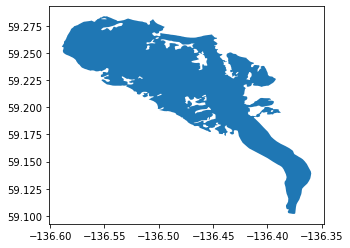

In [20]:
# Plot muir glacier outline for 2010-09-15 
muir_glacier_20100915.plot()

In [21]:
muir_glacier_20100915.total_bounds

array([-136.589288,   59.101829, -136.359729,   59.283752])

In [22]:
muir_glacier_20100915.crs

{'init': 'epsg:4326'}

In [23]:
# How do I see all the text?????? Tried options and set_option which are pandas methods but doesn't work for geopandas
#muir_glacier_20100915.options.display.max_colwidth
muir_glacier_20100915['proc_desc']

5019    Semi-automated glacier classification.; From R...
Name: proc_desc, dtype: object

In [24]:
# Get the Muir Glacier outline for 2010-09-16
muir_glacier_20100916 = muir_glacier.loc[muir_glacier['src_date']=="2010-09-16T00:00:00"]
muir_glacier_20100916[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
157164,Muir Glacier,G223569E59190N,2010-09-16T00:00:00,0.0,0.0,0.0,136.921


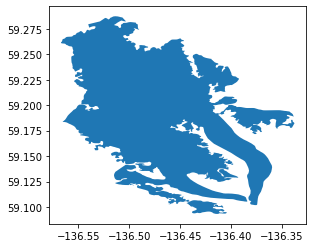

In [25]:
# Plot muir glacier outline for 2010-09-16
muir_glacier_20100916.plot()

In [26]:
# Get the Muir Glacier outline for 1999-08-01
muir_glacier_19990801 = muir_glacier.loc[muir_glacier['src_date']=="1999-08-01T00:00:00"]
muir_glacier_19990801[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
345293,Muir Glacier,G223569E59190N,1999-08-01T00:00:00,0.0,0.0,0.0,97.9299


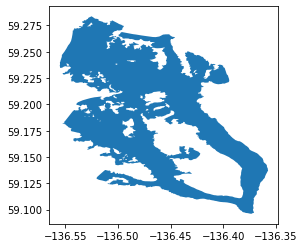

In [27]:
# Plot muir glacier outline for 1999-08-01
muir_glacier_19990801.plot()

In [28]:
# print area from database for 2010-09-15
print("area from database (km2):", muir_glacier_20100915['db_area'])
# Calculate area of muir glacier to see if it matches db_area. I need to pick an equal area crs
# These are not matching. Things look better from the RGI database in the expore-rgi notebook.
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:32633'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:3395'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'esri:102006'}).area/10**6)

area from database (km2): 5019    80.2843
Name: db_area, dtype: float64
5019    85.321147
dtype: float64
5019    305.078674
dtype: float64
5019    80.284341
dtype: float64
5019    80.284341
dtype: float64


In [29]:
# print area from database for 2010-09-16
print("area from database (km2):", muir_glacier_20100916['db_area'])
# Calculate area of muir glacier to see if it matches db_area. I need to pick an equal area crs
# These are not matching. Things look better from the RGI database in the expore-rgi notebook.
print(muir_glacier_20100916['geometry'].to_crs({'init': 'epsg:32633'}).area/10**6)
print(muir_glacier_20100916['geometry'].to_crs({'init': 'epsg:3395'}).area/10**6)
print(muir_glacier_20100916['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)
print(muir_glacier_20100916['geometry'].to_crs({'init': 'esri:102006'}).area/10**6)

area from database (km2): 157164    136.921
Name: db_area, dtype: float64
157164    145.530971
dtype: float64
157164    519.395161
dtype: float64
157164    136.920618
dtype: float64
157164    136.920618
dtype: float64


In [30]:
# print area from database for 1999-08-01
print("area from database (km2):", muir_glacier_19990801['db_area'])
# Calculate area of muir glacier to see if it matches db_area. I need to pick an equal area crs
# These are not matching. Things look better from the RGI database in the expore-rgi notebook.
print(muir_glacier_19990801['geometry'].to_crs({'init': 'epsg:32633'}).area/10**6)
print(muir_glacier_19990801['geometry'].to_crs({'init': 'epsg:3395'}).area/10**6)
print(muir_glacier_19990801['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)
print(muir_glacier_19990801['geometry'].to_crs({'init': 'esri:102006'}).area/10**6)

area from database (km2): 345293    97.9299
Name: db_area, dtype: float64
345293    104.086079
dtype: float64
345293    371.574335
dtype: float64
345293    97.929927
dtype: float64
345293    97.929927
dtype: float64


In [31]:
outline_0 = glims_polygons.iloc[0:1]
outline_0

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
0,debris_cov,121031.0,G006338E44942N,2013-03-25T00:00:00,0.0041,0.010639,0.0,61.1478,0.0,3040.0,...,33.0,French Alps,Laboratoire de Glaciologie et Géophysique de l...,30,30,30,30,"Rabatel, Antoine","Rabatel, Antoine","POLYGON Z ((6.339466 44.942715 0, 6.339479 44...."


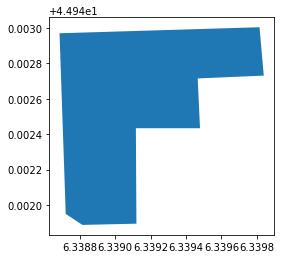

In [32]:
outline_0.plot()

### Seward Glacier - Alaska

In [33]:
# This line finds Seward glacier specifically
seward_glacier = glims_polygons[glims_polygons['glac_name']=='Seward Glacier']
seward_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
556,Seward Glacier,G219787E60289N,2000-08-31T20:28:00,0.0,0.0,0.00,3211.80
659,Seward Glacier,G219787E60289N,2000-08-31T20:28:00,0.0,0.0,0.00,3211.80
6733,Seward Glacier,G219787E60289N,2010-09-12T00:00:00,0.0,0.0,3362.66,3362.66
346758,Seward Glacier,G219787E60289N,2000-08-31T20:28:00,0.0,0.0,0.00,3211.80


### Pine Island Glacier - Antarctica

In [34]:
# This line finds pine island glacier in antarctica specifically
pine_island_glacier = glims_polygons[glims_polygons['glac_id']=='G263560E76894S']
pine_island_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area


## Investigate RC_ID

In [35]:
# Find the unique rc_id for GLIMS
# The rc_id is the GLIMS ID for the Regional Center
unique_rc_id = glims_polygons.rc_id.unique()
unique_rc_id

array([ 33.,  12.,  34., 602., 524.,  26.,  18., 761., 565.,  19., 573.,
       561.,  29.,   5., 571., 574.,   4.,   8.,  23.,  30., 556.,  37.,
       505.,   2.,  38., 507., 511.,  32.,  27.,  16., 502., 547.,   7.,
        22.,  10.,  17.,   3., 536., 526.,  20., 520., 550.,   9., 562.,
        28., 575., 576.])

In [36]:
# Select rc_id 602 which is in Region 1 (Alaska) just to see what this subset looks like
rc_id_602 = glims_polygons.loc[glims_polygons['rc_id']==602.0]
rc_id_602.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
533,debris_cov,58036.0,G223237E58554N,2006-05-25T07:48:23,0.0,495.176,0.0,0.0,4.0,0.0,...,602.0,Various (NSIDC),University of Colorado,0,0,0,0,"Beedle, Matthew","Beedle, Matthew","POLYGON Z ((-136.675873 58.385483 0, -136.6753..."
536,debris_cov,60414.0,G219795E60080N,2007-08-10T02:33:33,0.0,297.560,0.0,0.0,5.0,0.0,...,602.0,Various (NSIDC),University of Colorado,0,0,0,0,"Beedle, Matthew","Beedle, Matthew","POLYGON Z ((-140.10202 59.96069 0, -140.10102 ..."
537,debris_cov,53065.0,G222829E58804N,2006-05-29T19:01:21,0.0,162.882,0.0,0.0,5.0,0.0,...,602.0,Various (NSIDC),University of Colorado,0,0,0,0,"Beedle, Matthew","Beedle, Matthew","POLYGON Z ((-137.260638 58.805875 0, -137.2596..."
538,debris_cov,58036.0,G223237E58554N,2006-05-25T07:48:23,0.0,495.176,0.0,0.0,4.0,0.0,...,602.0,Various (NSIDC),University of Colorado,0,0,0,0,"Beedle, Matthew","Beedle, Matthew","POLYGON Z ((-136.662581 58.464275 0, -136.6641..."
539,debris_cov,58036.0,G223237E58554N,2006-05-25T07:48:23,0.0,495.176,0.0,0.0,4.0,0.0,...,602.0,Various (NSIDC),University of Colorado,0,0,0,0,"Beedle, Matthew","Beedle, Matthew","POLYGON Z ((-136.652551 58.490007 0, -136.6538..."


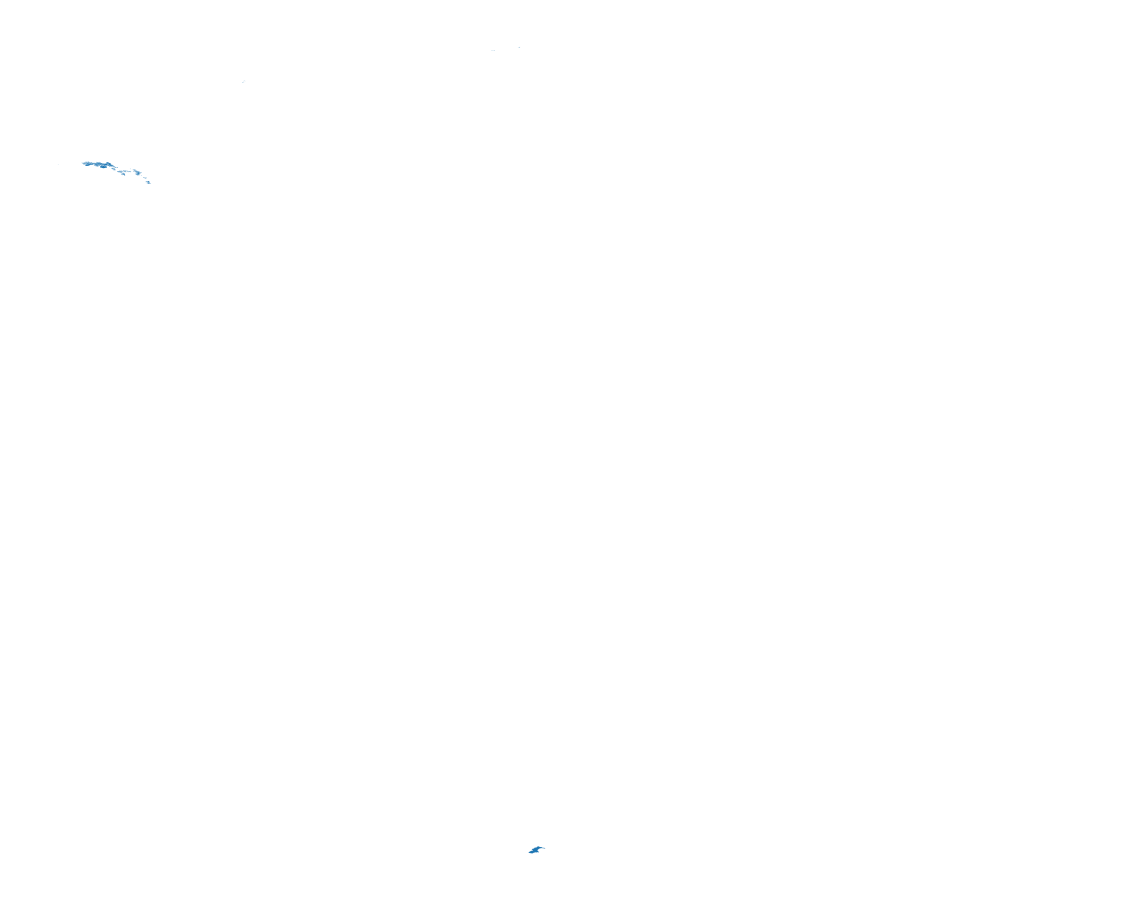

In [37]:
# Plot rc_id 602 sub region
# It appears that rc_id of 602 also appears in other regions
fig, ax = plt.subplots(figsize=(20, 20))
rc_id_602.plot(ax=ax)
ax.set_axis_off()

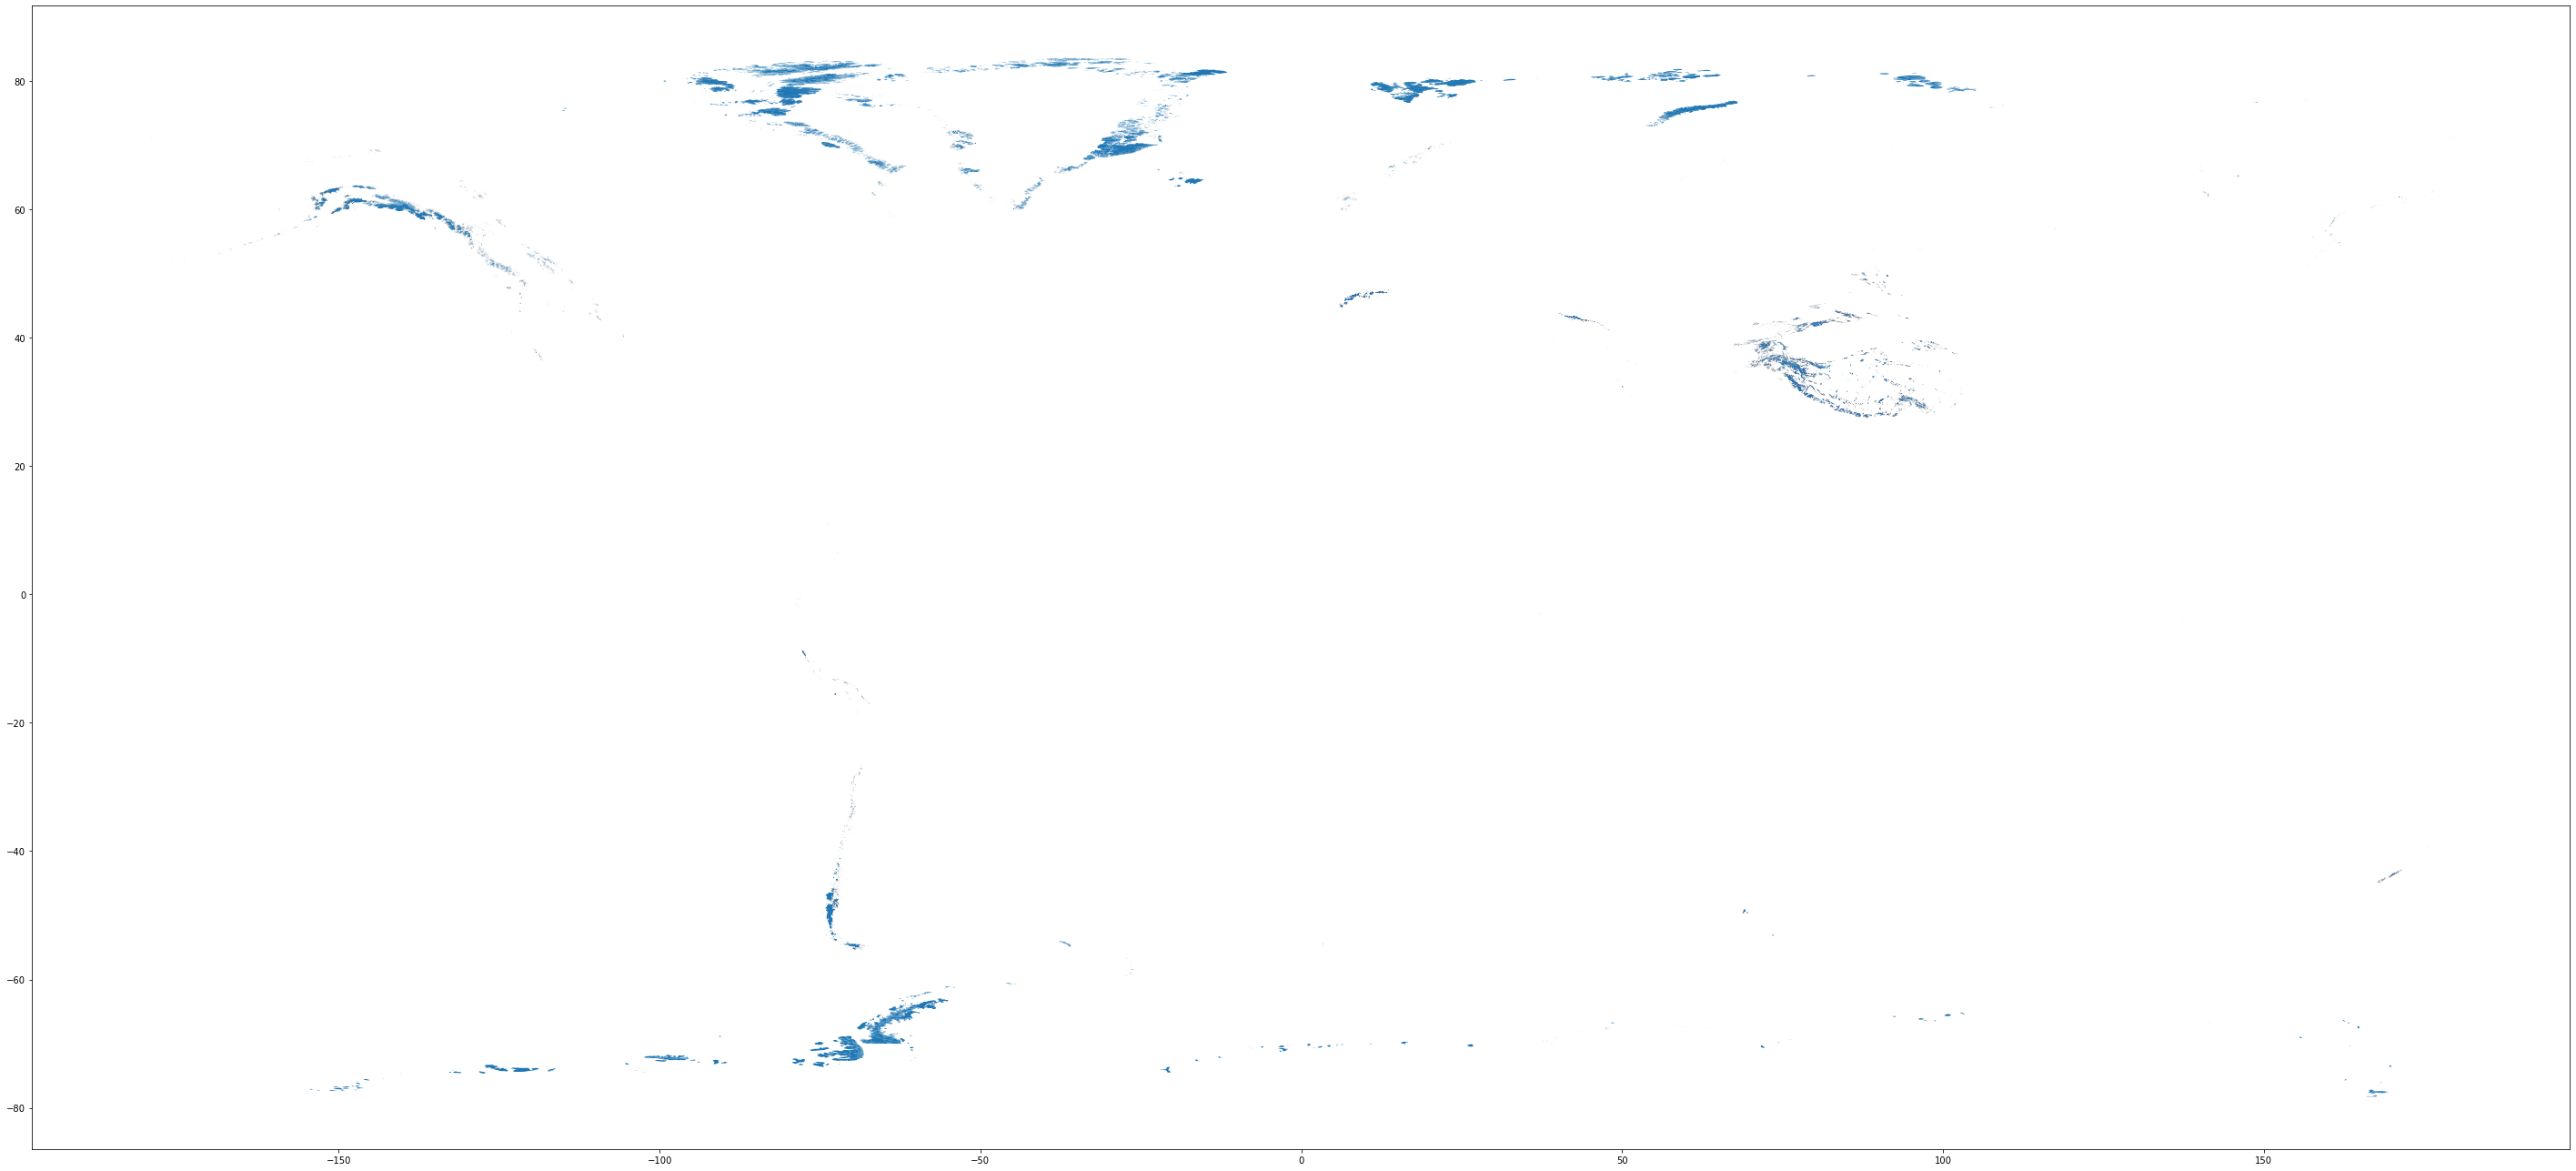

In [38]:
# Plot all glims data
fig, ax1 = plt.subplots(figsize=(50, 50))
#jan_mayan_region.plot(ax=ax1)
glims_polygons.plot(ax=ax1)

In [39]:
# Open cleaned GTN-G region shapefile
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)
glacier_regions

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1,ALA,"POLYGON ((-133 54.5, -134 54.5, -134 54, -134 ..."
1,Western Canada and USA,2,WNA,"POLYGON ((-133 54.5, -132 54.5, -131 54.5, -13..."
2,"Arctic Canada, North",3,ACN,"POLYGON ((-125.000000000415 74, -125.000000000..."
3,"Arctic Canada, South",4,ACS,"POLYGON ((-90 74, -89 74, -88 74, -87 74, -86 ..."
4,Greenland Periphery,5,GRL,"POLYGON ((-75 77, -74.73 77.51000000000001, -7..."
5,Iceland,6,ISL,"POLYGON ((-26 59, -26 60, -26 61, -26 62, -26 ..."
6,Svalbard and Jan Mayen,7,SJM,"POLYGON ((-10 70, -10 71, -10 72, -10 73, -10 ..."
7,Scandinavia,8,SCA,"POLYGON ((4 70, 4 71, 4 72, 4 73, 4 74, 5 74, ..."
8,Russian Arctic,9,RUA,"POLYGON ((35 70, 35 71, 35 72, 35 73, 35 74, 3..."
9,"Asia, North",10,ASN,"POLYGON ((128 46, 127.000000000178 46, 125.999..."


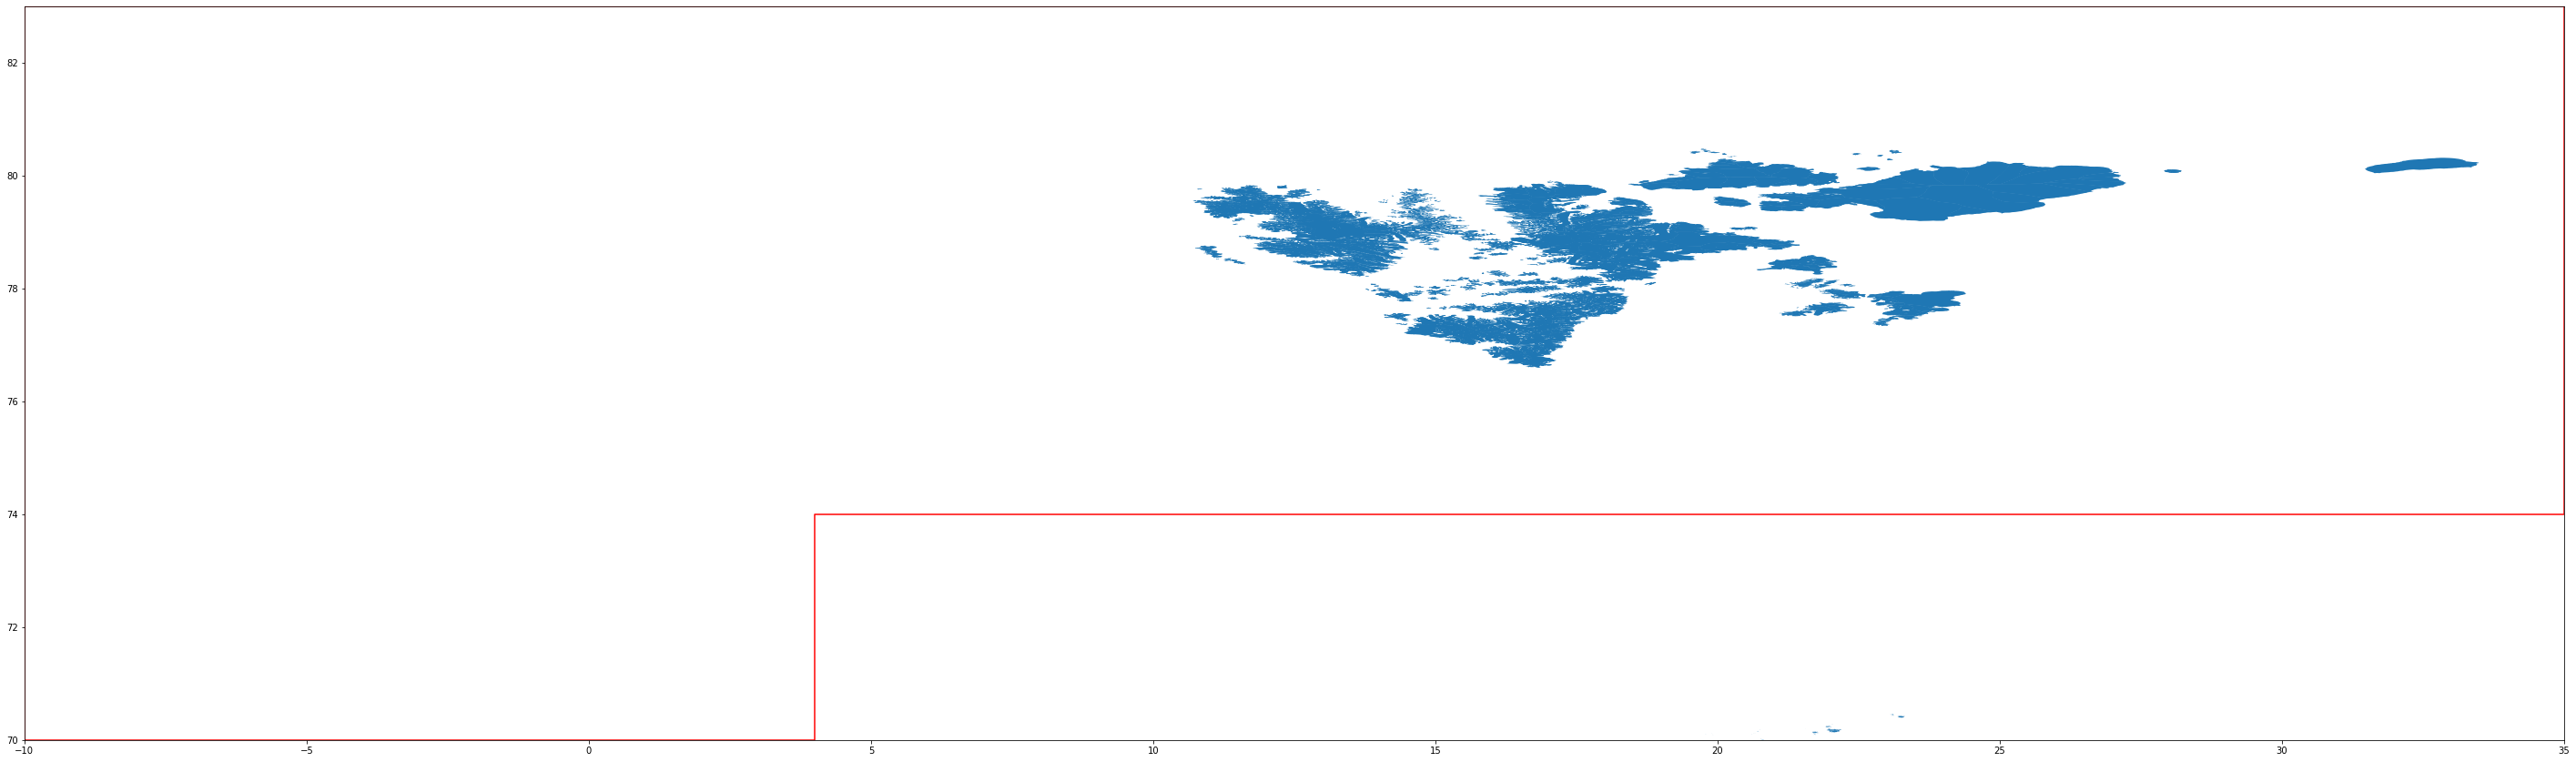

In [43]:
# Plot the region 7 outline on top of Region 7 data to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)

glims_polygons.plot(ax=ax1)
glacier_regions.loc[6:6].boundary.plot(ax=ax1, color='red')